# Visualizing data

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [30]:
df = pd.read_csv('flow2.csv', parse_dates= True)
df.head()

/tmp/ipykernel_815146/1905802851.py:1: DtypeWarning: Columns (3,5,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('flow2.csv', parse_dates= True)


,Timestamp,Datapath_id,Ip_src,Mac_src,Ip_dst,Mac_dst,Arp,Arp_code,Ip_protocole,Port_src,...,Packet_count,Pkt_per_sec,Pkt_per_nsec,Bytes,Bytes_per_sec,Bytes_per_nsec,Hard_timeout,Idle_timeout,Attack,Attack_type
0,1.712423e+09,1,192.168.217.254,NaN,192.168.217.133,NaN,0,NaN,17.0,67.0,...,0,0.0,0.0,0,0.0,0.0,120,60,0,NaN
1,1.712423e+09,1,192.168.217.254,NaN,192.168.217.133,NaN,0,NaN,17.0,67.0,...,0,0.0,0.0,0,0.0,0.0,120,60,0,NaN
2,1.712423e+09,1,192.168.217.254,NaN,192.168.217.133,NaN,0,NaN,17.0,67.0,...,0,0.0,0.0,0,0.0,0.0,120,60,0,NaN
3,1.712423e+09,1,192.168.217.254,NaN,192.168.217.133,NaN,0,NaN,17.0,67.0,...,0,0.0,0.0,0,0.0,0.0,120,60,0,NaN
4,1.712423e+09,1,192.168.217.254,NaN,192.168.217.133,NaN,0,NaN,17.0,67.0,...,0,0.0,0.0,0,0.0,0.0,120,60,0,NaN


In [31]:
df.shape

(1864563, 44)

---- Attack ----
[0 1]
Number of attacks: 2


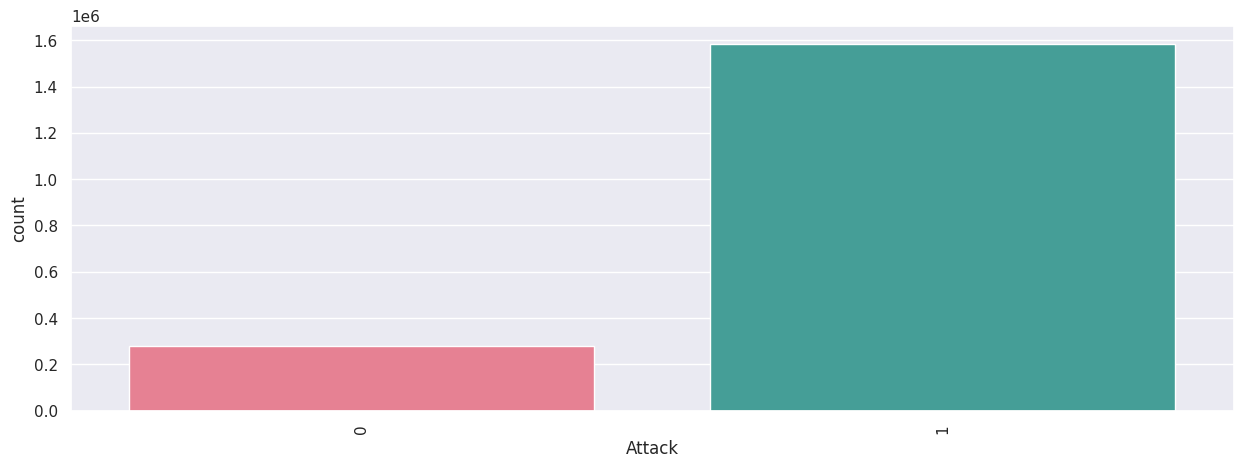

In [32]:
#check unique value for each column Attack
print('---- Attack ----')
print(df['Attack'].unique())
print('Number of attacks:', len(df['Attack'].unique()))
colors = sb.color_palette("husl", len(df['Attack'].unique()))
sb.set(rc={'figure.figsize':(15,5)})
#Plot Bar chart to understand Attacks
p=sb.countplot(x='Attack', hue='Attack', data=df, palette=colors, legend=False)
_ = plt.setp(p.get_xticklabels(), rotation=90)

In [33]:
df = df.drop(columns=['Timestamp', 'Datapath_id', 'Ip_src', 'Ip_dst', 'Mac_src', 'Mac_dst',
                        'Ip_protocole', 'Port_src','Tcp_flags','NS','WCR','ECE','URG','SSL','SSH', 'Hard_timeout', 'Idle_timeout','Attack_type'])
df

,Arp,Arp_code,Port_dst,Icmp,Icmp_code,Icmp_type,Tcp,ACK,PSH,RST,...,Dhcp,Flow_duration,Flow_dur_nsec,Packet_count,Pkt_per_sec,Pkt_per_nsec,Bytes,Bytes_per_sec,Bytes_per_nsec,Attack
0,0,NaN,68.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,...,1.0,0,641000000,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,0
1,0,NaN,68.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,...,1.0,10,644000000,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,0
2,0,NaN,68.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,...,1.0,20,648000000,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,0
3,0,NaN,68.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,...,1.0,30,656000000,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,0
4,0,NaN,68.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,...,1.0,40,664000000,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864558,0,NaN,60444.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0,...,0.0,74,824000000,8,0.108108,9.708738e-09,3436,46.432432,4.169903e-06,1
1864559,0,NaN,60460.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0,...,0.0,74,811000000,7,0.094595,8.631319e-09,1922,25.972973,2.369914e-06,1
1864560,0,NaN,60444.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,...,0.0,74,811000000,2,0.027027,2.466091e-09,444,6.000000,5.474723e-07,1
1864561,0,NaN,60444.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,...,0.0,74,810000000,1,0.013514,1.234568e-09,1351,18.256757,1.667901e-06,1


# Missing value analysis

In [34]:
number_null_value=df.isnull().sum()
number_null_value

Arp                     0
Arp_code          1852689
Port_dst           338242
Icmp                11874
Icmp_code         1538195
Icmp_type         1538195
Tcp                 11874
ACK                649666
PSH                649666
RST                649666
SYN                649666
FIN                649666
Http                11874
Ftp                 11874
Udp                 11874
Dns                 11874
Dhcp                11874
Flow_duration           0
Flow_dur_nsec           0
Packet_count            0
Pkt_per_sec             0
Pkt_per_nsec            0
Bytes                   0
Bytes_per_sec           0
Bytes_per_nsec          0
Attack                  0
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1864563 entries, 0 to 1864562
Data columns (total 26 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Arp             int64  
 1   Arp_code        float64
 2   Port_dst        float64
 3   Icmp            float64
 4   Icmp_code       float64
 5   Icmp_type       float64
 6   Tcp             float64
 7   ACK             float64
 8   PSH             float64
 9   RST             float64
 10  SYN             float64
 11  FIN             float64
 12  Http            float64
 13  Ftp             float64
 14  Udp             float64
 15  Dns             float64
 16  Dhcp            float64
 17  Flow_duration   int64  
 18  Flow_dur_nsec   int64  
 19  Packet_count    int64  
 20  Pkt_per_sec     float64
 21  Pkt_per_nsec    float64
 22  Bytes           int64  
 23  Bytes_per_sec   float64
 24  Bytes_per_nsec  float64
 25  Attack          int64  
dtypes: float64(20), int64(6)
memory usage: 369.9 MB


In [36]:
df[['Arp_code','Icmp_code','Icmp_type']] = df[['Arp_code','Icmp_code','Icmp_type']].fillna(-1).copy()
df[['Arp','Port_dst','Icmp','Tcp', 'ACK', 'PSH', 'RST', 'SYN', 'FIN', 'Http', 'Ftp', 'Udp', 'Dns', 'Dhcp']] = df[['Arp','Port_dst','Icmp','Tcp', 'ACK', 'PSH', 'RST', 'SYN', 'FIN', 'Http', 'Ftp', 'Udp', 'Dns', 'Dhcp']].fillna(0).copy()

# Correlation Analysis

### Data description

In [37]:
df.describe()

,Arp,Arp_code,Port_dst,Icmp,Icmp_code,Icmp_type,Tcp,ACK,PSH,RST,...,Dhcp,Flow_duration,Flow_dur_nsec,Packet_count,Pkt_per_sec,Pkt_per_nsec,Bytes,Bytes_per_sec,Bytes_per_nsec,Attack
count,1.864563e+06,1.864563e+06,1.864563e+06,1.864563e+06,1.864563e+06,1.864563e+06,1.864563e+06,1.864563e+06,1.864563e+06,1.864563e+06,...,1.864563e+06,1.864563e+06,1.864563e+06,1.864563e+06,1.864563e+06,1.864563e+06,1.864563e+06,1.864563e+06,1.864563e+06,1.864563e+06
mean,6.368248e-03,-9.836299e-01,1.307224e+04,1.750373e-01,-8.242773e-01,5.670235e-01,6.515720e-01,3.783702e-01,1.257152e-01,3.672979e-02,...,6.714710e-04,2.483750e+01,4.956385e+08,1.903991e+02,1.426158e+01,1.840200e-06,4.801560e+06,3.572297e+05,5.404087e-02,8.496849e-01
std,7.954682e-02,2.082615e-01,2.171975e+04,3.799991e-01,3.841692e-01,3.411146e+00,4.764725e-01,4.849807e-01,3.315283e-01,1.880977e-01,...,2.590406e-02,1.809135e+01,2.874235e+08,4.102711e+03,6.197134e+02,2.245038e-04,1.478351e+08,2.196727e+07,9.708830e+00,3.573801e-01
min,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,-1.000000e+00,2.100000e+01,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,9.000000e+00,2.480000e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,0.000000e+00,-1.000000e+00,5.300000e+01,0.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,2.200000e+01,4.920000e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,0.000000e+00,-1.000000e+00,3.455200e+04,0.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,4.000000e+01,7.430000e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,1.000000e+00,2.000000e+00,6.099800e+04,1.000000e+00,3.000000e+00,8.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.160000e+02,9.990000e+08,2.855880e+05,1.170120e+05,1.544450e-01,1.309046e+10,5.247171e+09,6.874668e+03,1.000000e+00


### Data correlation

<Axes: >

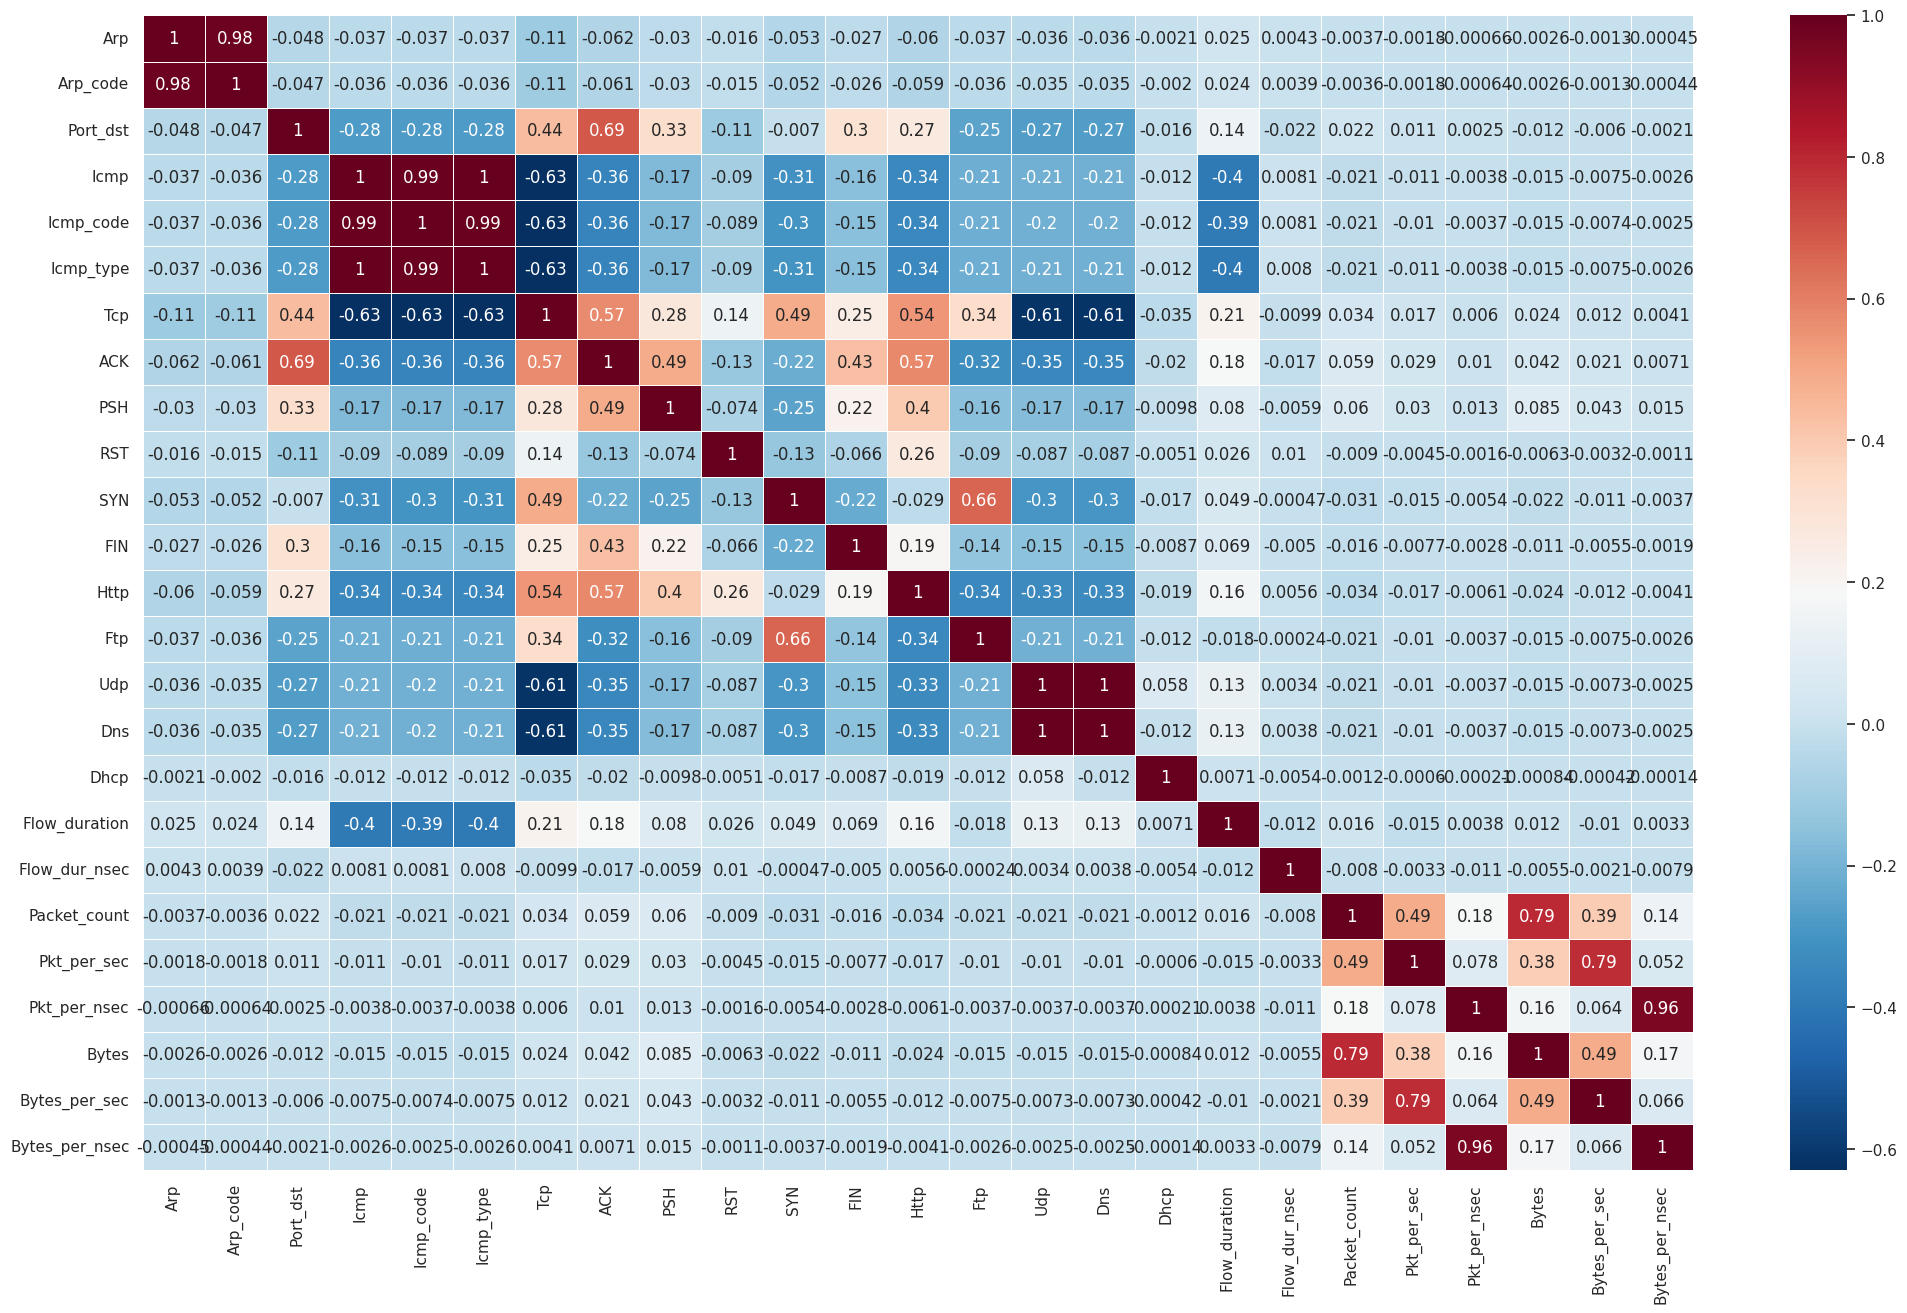

In [38]:
matrix_corr_pearson = df.drop(columns=['Attack'], axis=1).corr(method='pearson')
sb.set(rc={'figure.figsize':(25,15)})
sb.heatmap(matrix_corr_pearson,
            xticklabels=matrix_corr_pearson.columns,
            yticklabels=matrix_corr_pearson.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [39]:
columnsdrop=['Bytes_per_nsec','Flow_dur_nsec','Dns','Icmp','Icmp_code','Arp']
df=df.drop(columns=columnsdrop,axis=1)
df

,Arp_code,Port_dst,Icmp_type,Tcp,ACK,PSH,RST,SYN,FIN,Http,Ftp,Udp,Dhcp,Flow_duration,Packet_count,Pkt_per_sec,Pkt_per_nsec,Bytes,Bytes_per_sec,Attack
0,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,0.000000,0.000000e+00,0,0.000000,0
1,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,10,0,0.000000,0.000000e+00,0,0.000000,0
2,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,20,0,0.000000,0.000000e+00,0,0.000000,0
3,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,30,0,0.000000,0.000000e+00,0,0.000000,0
4,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,40,0,0.000000,0.000000e+00,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864558,-1.0,60444.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,74,8,0.108108,9.708738e-09,3436,46.432432,1
1864559,-1.0,60460.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,74,7,0.094595,8.631319e-09,1922,25.972973,1
1864560,-1.0,60444.0,-1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,74,2,0.027027,2.466091e-09,444,6.000000,1
1864561,-1.0,60444.0,-1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,74,1,0.013514,1.234568e-09,1351,18.256757,1


# Feature Engineering

In [40]:
columns=list(df.columns)
columns

['Arp_code',
 'Port_dst',
 'Icmp_type',
 'Tcp',
 'ACK',
 'PSH',
 'RST',
 'SYN',
 'FIN',
 'Http',
 'Ftp',
 'Udp',
 'Dhcp',
 'Flow_duration',
 'Packet_count',
 'Pkt_per_sec',
 'Pkt_per_nsec',
 'Bytes',
 'Bytes_per_sec',
 'Attack']

In [41]:
df.dtypes

Arp_code         float64
Port_dst         float64
Icmp_type        float64
Tcp              float64
ACK              float64
PSH              float64
RST              float64
SYN              float64
FIN              float64
Http             float64
Ftp              float64
Udp              float64
Dhcp             float64
Flow_duration      int64
Packet_count       int64
Pkt_per_sec      float64
Pkt_per_nsec     float64
Bytes              int64
Bytes_per_sec    float64
Attack             int64
dtype: object

In [42]:
print(len(df['Attack'].unique()))

2


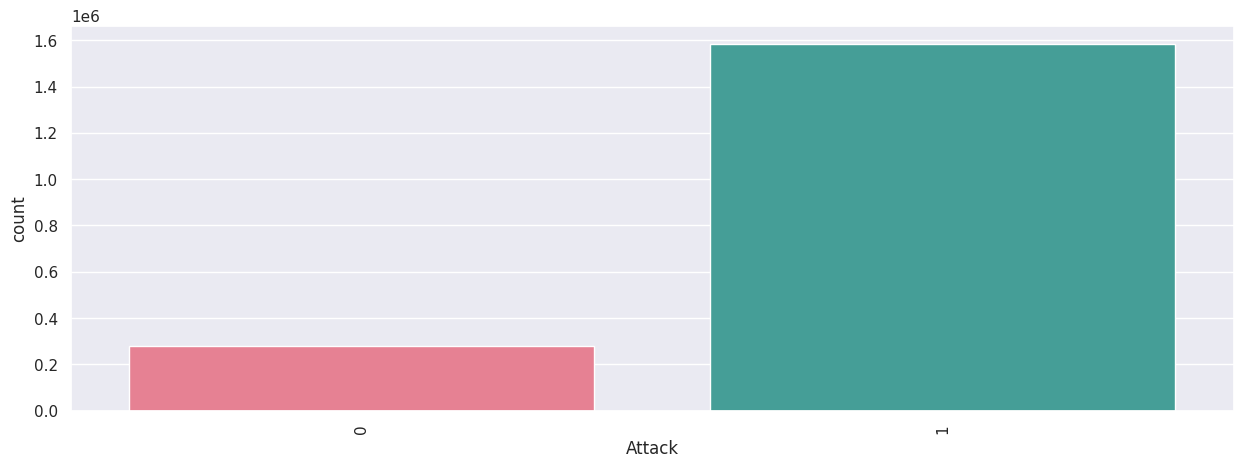

In [43]:
colors = sb.color_palette("husl", len(df['Attack'].unique()))
sb.set(rc={'figure.figsize':(15,5)})
#Plot Bar chart to understand Attack types
p=sb.countplot(x='Attack', hue='Attack', data=df, palette=colors, legend=False)
_ = plt.setp(p.get_xticklabels(), rotation=90)

In [44]:
df.groupby('Attack').size()

Attack
0     280272
1    1584291
dtype: int64

In [45]:
df.shape

(1864563, 20)

# Dataset Separation


In [46]:
df_attack = df[df['Attack']==1]
df_attack=df_attack.reset_index(drop=True)
df_attack

,Arp_code,Port_dst,Icmp_type,Tcp,ACK,PSH,RST,SYN,FIN,Http,Ftp,Udp,Dhcp,Flow_duration,Packet_count,Pkt_per_sec,Pkt_per_nsec,Bytes,Bytes_per_sec,Attack
0,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3,0,0.000000,0.000000e+00,0,0.000000,1
1,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,13,0,0.000000,0.000000e+00,0,0.000000,1
2,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,23,0,0.000000,0.000000e+00,0,0.000000,1
3,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,33,0,0.000000,0.000000e+00,0,0.000000,1
4,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,43,0,0.000000,0.000000e+00,0,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584286,-1.0,60444.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,74,8,0.108108,9.708738e-09,3436,46.432432,1
1584287,-1.0,60460.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,74,7,0.094595,8.631319e-09,1922,25.972973,1
1584288,-1.0,60444.0,-1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,74,2,0.027027,2.466091e-09,444,6.000000,1
1584289,-1.0,60444.0,-1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,74,1,0.013514,1.234568e-09,1351,18.256757,1


In [47]:
df_attack = df_attack.drop('Attack', axis=1)
df_attack

,Arp_code,Port_dst,Icmp_type,Tcp,ACK,PSH,RST,SYN,FIN,Http,Ftp,Udp,Dhcp,Flow_duration,Packet_count,Pkt_per_sec,Pkt_per_nsec,Bytes,Bytes_per_sec
0,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3,0,0.000000,0.000000e+00,0,0.000000
1,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,13,0,0.000000,0.000000e+00,0,0.000000
2,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,23,0,0.000000,0.000000e+00,0,0.000000
3,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,33,0,0.000000,0.000000e+00,0,0.000000
4,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,43,0,0.000000,0.000000e+00,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584286,-1.0,60444.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,74,8,0.108108,9.708738e-09,3436,46.432432
1584287,-1.0,60460.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,74,7,0.094595,8.631319e-09,1922,25.972973
1584288,-1.0,60444.0,-1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,74,2,0.027027,2.466091e-09,444,6.000000
1584289,-1.0,60444.0,-1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,74,1,0.013514,1.234568e-09,1351,18.256757


In [48]:
df= df[df['Attack']==0]
df=df.reset_index(drop=True)
df

,Arp_code,Port_dst,Icmp_type,Tcp,ACK,PSH,RST,SYN,FIN,Http,Ftp,Udp,Dhcp,Flow_duration,Packet_count,Pkt_per_sec,Pkt_per_nsec,Bytes,Bytes_per_sec,Attack
0,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,0.000000,0.000000,0,0.000000e+00,0
1,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,10,0,0.000000,0.000000,0,0.000000e+00,0
2,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,20,0,0.000000,0.000000,0,0.000000e+00,0
3,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,30,0,0.000000,0.000000,0,0.000000e+00,0
4,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,40,0,0.000000,0.000000,0,0.000000e+00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280267,-1.0,5005.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52,4020,77.307692,0.000008,6083384,1.169882e+05,0
280268,-1.0,5005.0,-1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52,147079,2828.442308,0.000300,6685020814,1.285581e+08,0
280269,-1.0,34228.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52,110957,2133.788462,0.000240,7323330,1.408333e+05,0
280270,-1.0,5005.0,-1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,50,0,0.000000,0.000000,0,0.000000e+00,0


In [49]:
df=df.drop('Attack', axis=1)
df

,Arp_code,Port_dst,Icmp_type,Tcp,ACK,PSH,RST,SYN,FIN,Http,Ftp,Udp,Dhcp,Flow_duration,Packet_count,Pkt_per_sec,Pkt_per_nsec,Bytes,Bytes_per_sec
0,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,0.000000,0.000000,0,0.000000e+00
1,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,10,0,0.000000,0.000000,0,0.000000e+00
2,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,20,0,0.000000,0.000000,0,0.000000e+00
3,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,30,0,0.000000,0.000000,0,0.000000e+00
4,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,40,0,0.000000,0.000000,0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280267,-1.0,5005.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52,4020,77.307692,0.000008,6083384,1.169882e+05
280268,-1.0,5005.0,-1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52,147079,2828.442308,0.000300,6685020814,1.285581e+08
280269,-1.0,34228.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52,110957,2133.788462,0.000240,7323330,1.408333e+05
280270,-1.0,5005.0,-1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,50,0,0.000000,0.000000,0,0.000000e+00


In [50]:
df.describe()

,Arp_code,Port_dst,Icmp_type,Tcp,ACK,PSH,RST,SYN,FIN,Http,Ftp,Udp,Dhcp,Flow_duration,Packet_count,Pkt_per_sec,Pkt_per_nsec,Bytes,Bytes_per_sec
count,280272.000000,280272.000000,280272.000000,280272.000000,280272.000000,280272.000000,280272.0,280272.000000,280272.000000,280272.000000,280272.000000,280272.000000,280272.000000,280272.000000,280272.000000,280272.000000,280272.000000,2.802720e+05,2.802720e+05
mean,-0.893132,39367.659377,-0.940379,0.942149,0.807423,0.145880,0.0,0.269353,0.270080,0.087626,0.053291,0.004253,0.004253,29.742033,1264.108762,94.683596,0.000012,3.194300e+07,2.376521e+06
std,0.522375,18589.095883,0.696661,0.233462,0.394324,0.352986,0.0,0.443624,0.444002,0.282750,0.224614,0.065076,0.065076,17.517485,10517.680835,1595.932316,0.000579,3.801702e+08,5.661748e+07
min,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,-1.000000,35905.000000,-1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
50%,-1.000000,44102.000000,-1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
75%,-1.000000,52563.000000,-1.000000,1.000000,1.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,45.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
max,2.000000,60986.000000,8.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,116.000000,285588.000000,117012.000000,0.154445,1.309046e+10,5.247171e+09


# Train, validation and test dataset

In [51]:
X_train, X_valid, X_test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/home/manel/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [52]:
print(X_train['Port_dst'].describe())

count    168163.000000
mean      39370.551001
std       18589.790436
min           0.000000
25%       35905.000000
50%       44105.000000
75%       52574.000000
max       60986.000000
Name: Port_dst, dtype: float64


In [53]:
from feature_engine.encoding import CountFrequencyEncoder
X_train['Port_dst'] = X_train['Port_dst'].astype('object')
X_valid['Port_dst'] = X_valid['Port_dst'].astype('object')
X_test['Port_dst'] = X_test['Port_dst'].astype('object')
count_enc = CountFrequencyEncoder(
    encoding_method="frequency", 
    variables=['Port_dst'])
count_enc.fit(X_train)
X = count_enc.transform(df)
X_attack= count_enc.transform(df_attack)
X_train = count_enc.transform(X_train)
X_valid = count_enc.transform(X_valid)
# print(X_train['Port_dst'].describe())
X_test = count_enc.transform(X_test)

/home/manel/.local/lib/python3.10/site-packages/feature_engine/encoding/base_encoder.py:260: UserWarning: During the encoding, NaN values were introduced in the feature(s) Port_dst.
  warnings.warn(


## Standardization

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num=['Flow_duration','Packet_count','Pkt_per_sec','Pkt_per_nsec','Bytes','Bytes_per_sec']
scaler.fit(X_train[num])
X_train[num] = scaler.transform(X_train[num])
X_valid[num] = scaler.transform(X_valid[num])
X_attack[num] = scaler.transform(X_attack[num])
X[num] = scaler.transform(X[num])
X_test[num] = scaler.transform(X_test[num])

# Autoencoders

In [80]:
import tensorflow as tf

# Define the encoder
encoder_input = tf.keras.layers.Input((df.shape[1],))
encoder = tf.keras.layers.Dense(10)(encoder_input)

# Define the decoder
decoder = tf.keras.layers.Dense(5)(encoder)  # Increase back to half the number of features
decoder = tf.keras.layers.Dense((df.shape[1]))(decoder)  # Output layer with linear activation

# Create the autoencoder model
autoencoder = tf.keras.Model(inputs =encoder_input, outputs = decoder)
# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['Accuracy'])

# Print the model summary
# autoencoder.summary()

In [81]:
# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['Accuracy'])

# Print the model summary
autoencoder.summary()

# Train the model Fit autoencoder
autoencoder.fit(X_train, X_train, epochs=100, batch_size=10000, validation_data=(X_valid, X_valid))

Model: "functional_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)     │ (None, 19)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 10)             │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 19)             │           114 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 369 (1.44 KB)

 Trainable params: 369 (1.44 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - Accuracy: 6.4299e-04 - loss: 0.9511 - val_Accuracy: 0.0013 - val_loss: 0.8370
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - Accuracy: 0.0206 - loss: 0.8283 - val_Accuracy: 0.0844 - val_loss: 0.6959
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - Accuracy: 0.0944 - loss: 0.6504 - val_Accuracy: 0.1571 - val_loss: 0.6045
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - Accuracy: 0.1862 - loss: 0.5844 - val_Accuracy: 0.2808 - val_loss: 0.5390
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - Accuracy: 0.3028 - loss: 0.5004 - val_Accuracy: 0.3842 - val_loss: 0.4911
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - Accuracy: 0.3990 - loss: 0.4667 - val_Accuracy: 0.4716 - val_loss: 0.4524
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - Accuracy: 0.4837 - loss: 0.4435 - val_Accuracy: 0.5326 - val_loss: 0.4204
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - Accuracy: 0.5436 - loss: 0.4025 - val_Accuracy: 0.596